In [1]:
# Загрузка зависимостей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

Using TensorFlow backend.


In [2]:
# Загрузка подготовленного набора данных
dataset = pd.read_csv('prepared_data.csv')
dataset.head(10)

,tpsa,saacc,h-050,mlogp,rdchi,gats1p,nn,c-040,lc50
0,0.514570,0.411306,0.000000,0.019635,-1.875809,-0.955340,0.001262,0.00000,-0.455071
1,0.514570,0.411306,0.000000,0.159062,-1.554684,-1.066755,0.001262,0.00000,-0.093061
2,0.123412,0.107901,0.000000,1.745911,0.652219,-1.568754,0.001262,0.00000,1.307301
3,0.123412,0.107901,0.000000,1.598251,0.599535,-1.535789,0.001262,0.00000,1.168207
4,0.123412,0.107901,0.000000,0.954059,0.439081,-0.868297,0.001262,0.00000,0.804428
5,1.000000,1.000000,0.375897,-2.248683,2.363947,0.778006,0.001262,0.85619,0.847093
6,0.123412,0.107901,0.000000,0.211611,-0.134453,0.392174,0.001262,0.00000,1.453502
7,0.514570,0.411306,0.000000,0.530092,-0.138569,-0.110742,0.001262,0.00000,-0.231058
8,0.514570,0.411306,0.000000,-0.218431,-0.894383,0.590631,0.001262,0.00000,-0.328732
9,0.514570,0.411306,0.000000,0.225688,-1.105498,0.925043,0.001262,0.00000,-0.411327


In [3]:
X = dataset.drop(columns=['mlogp', 'c-040']).values
Y = dataset['lc50'].values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [5]:
# Задаем параметры структуры нейронной сети.


input_layer_size = 7


first_hidden_layer_size = 8
second_hidden_layer_size = 8

output_layer_size = 1


epochs_number = 100
batch_size = 8

In [6]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

model.add(Dense(second_hidden_layer_size, activation='relu'))

model.add(Dense(output_layer_size, activation='linear'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Настройка нейронной сети.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [9]:
# Обучение нейронной сети.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 436 samples, validate on 110 samples
Epoch 1/100
436/436 [==============================] - 1s 1ms/step - loss: 1.0634 - mean_absolute_error: 0.8064 - mean_squared_error: 1.0634 - val_loss: 0.6704 - val_mean_absolute_error: 0.6406 - val_mean_squared_error: 0.6704
Epoch 2/100
436/436 [==============================] - 0s 682us/step - loss: 0.6593 - mean_absolute_error: 0.6395 - mean_squared_error: 0.6593 - val_loss: 0.4001 - val_mean_absolute_error: 0.4908 - val_mean_squared_error: 0.4001
Epoch 3/100
436/436 [==============================] - 0s 347us/step - loss: 0.3571 - mean_absolute_error: 0.4622 - mean_squared_error: 0.3571 - val_loss: 0.2245 - val_mean_absolute_error: 0.3614 - val_mean_squared_error: 0.2245
Epoch 4/100
436/436 [==============================] - 0s 412us/step - loss: 0.1863 - mean_absolute_error: 0.3289 - mean_squared_error: 0.1863 - val_loss: 0.1400 - val_mean_absolute_error: 0.2873 - val_mean_squared_error: 0.1400
Epoch 5/100
436/436 [===================

436/436 [==============================] - 0s 393us/step - loss: 0.0029 - mean_absolute_error: 0.0409 - mean_squared_error: 0.0029 - val_loss: 0.0029 - val_mean_absolute_error: 0.0439 - val_mean_squared_error: 0.0029
Epoch 37/100
436/436 [==============================] - 0s 318us/step - loss: 0.0028 - mean_absolute_error: 0.0400 - mean_squared_error: 0.0028 - val_loss: 0.0028 - val_mean_absolute_error: 0.0421 - val_mean_squared_error: 0.0028
Epoch 38/100
436/436 [==============================] - 0s 374us/step - loss: 0.0026 - mean_absolute_error: 0.0400 - mean_squared_error: 0.0026 - val_loss: 0.0027 - val_mean_absolute_error: 0.0414 - val_mean_squared_error: 0.0027
Epoch 39/100
436/436 [==============================] - 0s 306us/step - loss: 0.0025 - mean_absolute_error: 0.0382 - mean_squared_error: 0.0025 - val_loss: 0.0025 - val_mean_absolute_error: 0.0406 - val_mean_squared_error: 0.0025
Epoch 40/100
436/436 [==============================] - 0s 366us/step - loss: 0.0024 - mean_a

436/436 [==============================] - 0s 303us/step - loss: 6.0068e-04 - mean_absolute_error: 0.0184 - mean_squared_error: 6.0068e-04 - val_loss: 6.7419e-04 - val_mean_absolute_error: 0.0204 - val_mean_squared_error: 6.7419e-04
Epoch 72/100
436/436 [==============================] - 0s 359us/step - loss: 5.7891e-04 - mean_absolute_error: 0.0181 - mean_squared_error: 5.7891e-04 - val_loss: 6.7302e-04 - val_mean_absolute_error: 0.0194 - val_mean_squared_error: 6.7302e-04
Epoch 73/100
436/436 [==============================] - 0s 292us/step - loss: 5.5929e-04 - mean_absolute_error: 0.0179 - mean_squared_error: 5.5929e-04 - val_loss: 7.0659e-04 - val_mean_absolute_error: 0.0202 - val_mean_squared_error: 7.0659e-04
Epoch 74/100
436/436 [==============================] - 0s 276us/step - loss: 5.4616e-04 - mean_absolute_error: 0.0176 - mean_squared_error: 5.4616e-04 - val_loss: 6.3348e-04 - val_mean_absolute_error: 0.0193 - val_mean_squared_error: 6.3348e-04
Epoch 75/100
436/436 [=======

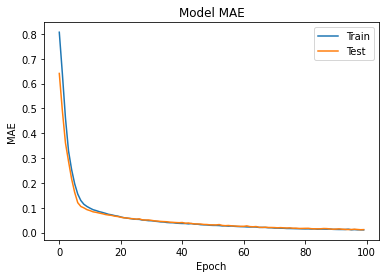

In [10]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

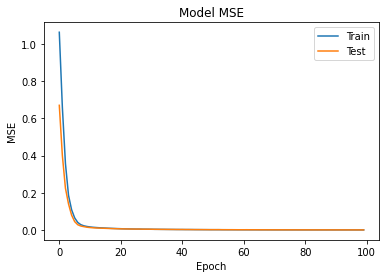

In [11]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [12]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

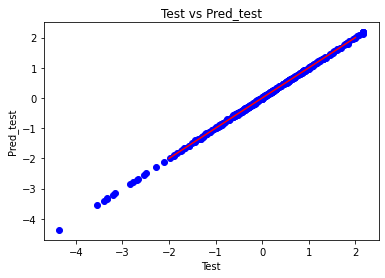

In [13]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

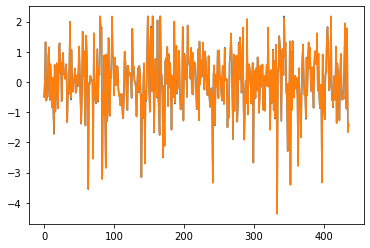

In [14]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [15]:
# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

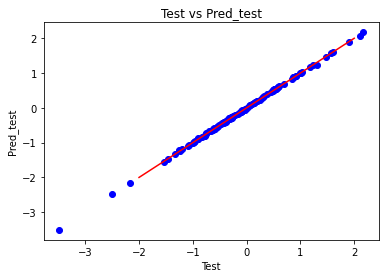

In [16]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

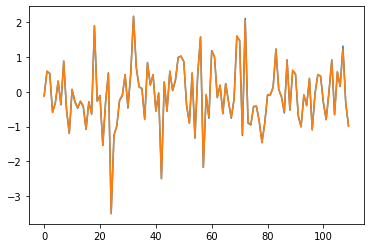

In [17]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [18]:
# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.014294109218840261
0.016874309229993337


In [19]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.979444682598114, p = 7.6234327934798785e-06
Test k = 0.903273344039917, p = 7.504825703108509e-07


In [20]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.9655949473381042, p_s = 5.266091451794352e-10
k_n = 61.43231710939624, p_n = 4.572374925251356e-14


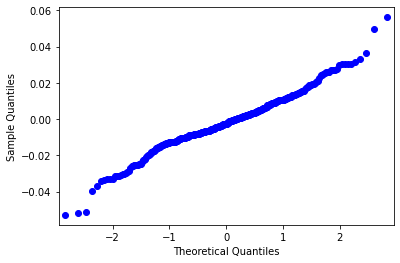

In [21]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

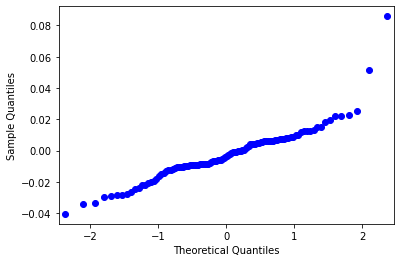

In [22]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

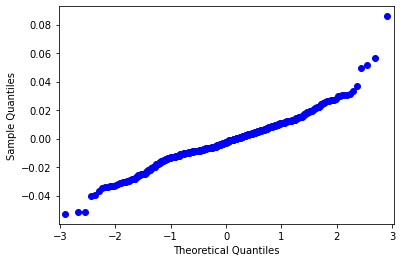

In [23]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

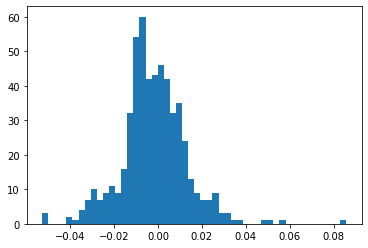

In [24]:
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [25]:
model.save('SimpleNeuralNetwork.h5')